In [1]:
import numpy as np
import Functional_Fusion.atlas_map as am
import Functional_Fusion.dataset as ds
import Functional_Fusion.util as ut
import nibabel as nb
import nilearn.plotting as nlp
import matplotlib.pyplot as plt
from numpy.linalg import inv
from matplotlib.gridspec import GridSpec

In [2]:
base_dir = ut.get_base_dir()


In [3]:
dn,ainf = am.get_atlas('MNISymDentate1')
dat,dinf,_ = ds.get_dataset(base_dir,'Language',atlas='MNISymDentate1', sess='ses-localizer',subj=[1],type='cond_fm_CondRun')

In [4]:
adir = ut.default_atlas_dir
bg_img = nb.load(adir + '/tpl-MNI152NLin2009cSym/tpl-MNI152NLin2009cSym_res-1_dentate.nii')
# Project the functional data into the atlas space
fcn_img = dn.data_to_nifti(dat[0,:])

In [ ]:
# Cut out the voxel correct coordinates 
c1 = np.array([-25,-70,-43]).reshape((3,1)) # Lower left corner of image 
c2 = np.array([25,-40,-20]).reshape((3,1)) # Upper right corner of image
# transform these into voxel coordinates 
v1 = nt.affine_transform_mat(c1,inv(bg_img.affine)).astype(int).squeeze()
v2 = nt.affine_transform_mat(c2,inv(bg_img.affine)).astype(int).squeeze()

/Users/jdiedrichsen/opt/miniconda3/lib/python3.11/site-packages/nilearn/plotting/img_plotting.py:238: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  data = safe_get_data(img, ensure_finite=True)


<Figure size 1000x1000 with 0 Axes>

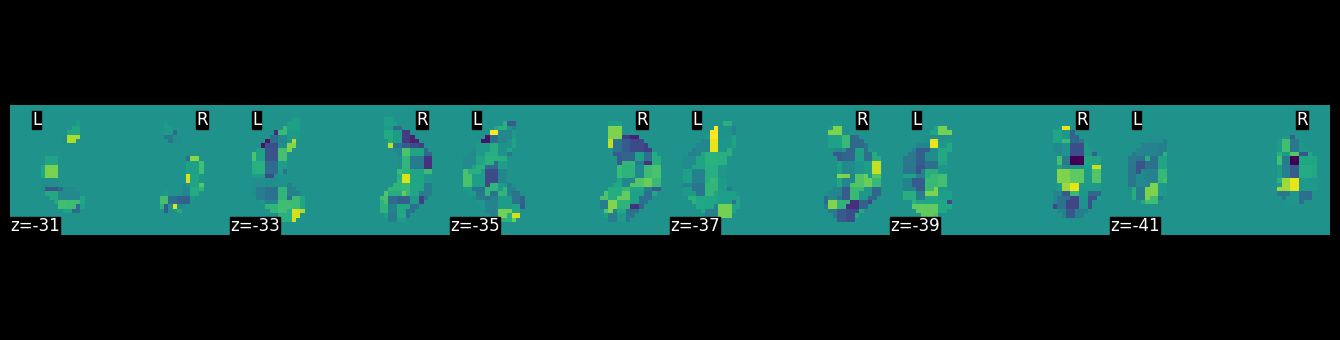

In [11]:
bg = bg_img.slicer[v1[0]:v2[0],v1[1]:v2[1],v1[2]:v2[2]]
fc = fcn_img.slicer[v1[0]:v2[0],v1[1]:v2[1],v1[2]:v2[2],0]
fig = plt.figure(figsize=(10,10))
nlp.plot_img(fc,bg_img=bg,
    display_mode="z",
    cut_coords=[-31,-33,-35,-37,-39,-41],
    black_bg=True)

In [7]:
# Cut out the voxel correct coordinates 
c1 = np.array([[-25,-70,-43],[-7,-70,-43]]).T # Lower left corner of image 
c2 = np.array([[7,-40,-20],[25,-70,-43]]).T # Upper right corner of image
v1 = nt.affine_transform_mat(c1,inv(bg_img.affine)).astype(int)
v2 = nt.affine_transform_mat(c2,inv(bg_img.affine)).astype(int)

In [8]:

# Cut out left and right dentate

for i in range(2):
    bg.append(bg_img.slicer[v1[0]:v2[0],v1[1]:v2[1],v1[2]:v2[2]])
    fc.append(fcn_img.slicer[v1[0]:v2[0],v1[1]:v2[1],v1[2]:v2[2],0])

fig = plt.figure(figsize=(10,10))

gs = GridSpec(6, 2)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])
nlp.plot_img(fc,bg_img=bg,
    display_mode="z",
    axes=ax,
    cut_coords=[-31,-33,-35,-37,-39],
    black_bg=True)

AttributeError: 'Nifti1Image' object has no attribute 'append'